In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from Scripts import BDI, behaviour
from scipy.optimize import differential_evolution
from skopt import load, dump
import pandas as pd
from datetime import date    

In [3]:
## Set Path and Load in Data
path = r'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Behavioural_Data'
data = behaviour.combineBehaviour(path = path, all_key = True, 
                                  subj_key= 0, polarity_key = 0, exp_key = 0)

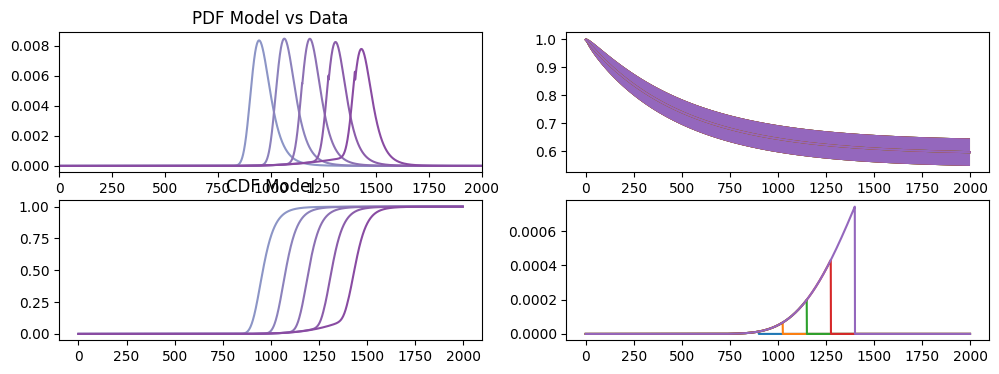

In [4]:
## Test different parameter ranges here
params = [1, 5.9e-01, 2, 9.8e-02, 3.64e-03, 6.06e-04, 1, 1]
BDI.plotBDIFit(modelFit = None, params = params, data = None, 
           numBins = 5, minDelay = 750, maxDelay = 1250, plotLabel = 'Testing Parameter Range')

In [10]:
# Fit Model to Grouped data- 5 delay bins
bnds = ((1, 1), (.4,.6), (1, 2), 
        (.05, .1), (2/1000, 6/1000), 
        (.8/1000, 2/1000), (0.01,1), (1,1)) 
delayBins = 5
modelFit = differential_evolution(BDI.fitBaselineModel, bounds = bnds, args=([data, delayBins]))
dump(modelFit, fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_group')
BDI.plotBDIFit(modelFit = modelFit, data = data, params = None, numBins = 5, minDelay = 750, maxDelay = 1100, plotLabel = 'group')


[1.00000000e+00 5.99552320e-01 1.00885294e+00 5.98557957e-02
 3.97505939e-03 8.00350318e-04 9.29713787e-01 1.00000000e+00]


TypeError: plotBDIFit() missing 1 required positional argument: 'plotLabel'

In [6]:
# Fit model to repetition data 

# set path and load data
groupData = behaviour.combineBehaviour(path = path, all_key = True, 
                                       subj_key= 0, polarity_key = 0, exp_key = 0) # load data

# Set parameters for fitting
bnds =((1, 1), (.4,.6), (0.5, 1), 
                (.05, .1), (2/1000, 6/1000), (.6/1000, 1/1000), (1,1), (1,1))
delayBins = 5
nback = 5   # number of trials back in sequence

# Loop over choice sequence data, fit individually
for seq in range(nback):
    repData = groupData.loc[groupData['Rep Number']== seq]
    modelFit = differential_evolution(BDI.fitBaselineModel, bounds = bnds, args=([repData, delayBins]))
    dump(modelFit, fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_group_rep_{seq}')
    modelFit = load(fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_group_rep_{seq}')

for seq in range(nback):
    altData = groupData.loc[groupData['Alt Number']== seq]
    modelFit = differential_evolution(BDI.fitBaselineModel, bounds = bnds, args=([altData, delayBins]))
    dump(modelFit, fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_group_alt_{seq}')

c:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\venv\lib\site-packages\scipy\optimize\_numdiff.py:579: RuntimeWarning: divide by zero encountered in true_divide
  J_transposed[i] = df / dx


In [12]:
## Plot model output

for seq in range(nback): 

    repData = groupData.loc[groupData['Rep Number']== seq]
    modelFit = load(fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_group_rep_{seq}')
    BDI.plotBDIFit(modelFit = modelFit, params = None, data = repData, numBins = 5, minDelay = 750, maxDelay = 1100)
    
    altData = groupData.loc[groupData['Alt Number']== seq]
    modelFit = load(fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_group_alt_{seq}')
    BDI.plotBDIFit(modelFit = modelFit, params = None, data = altData, numBins = 5, minDelay = 750, maxDelay = 1100)


ModuleNotFoundError: No module named 'scipy.optimize._optimize'

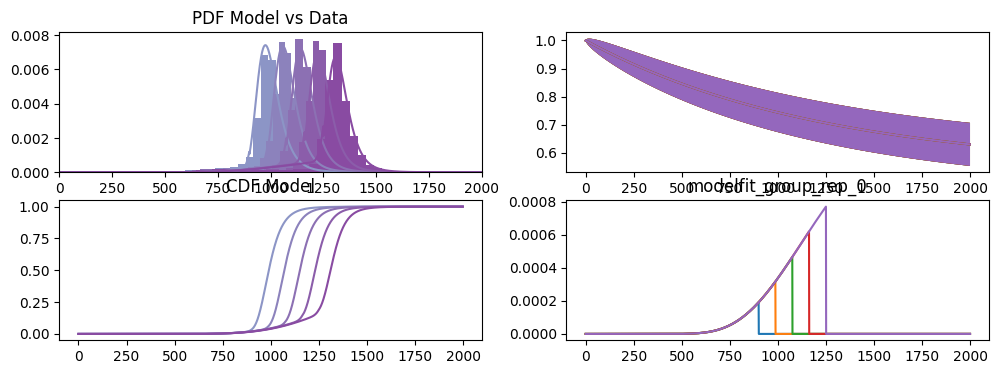

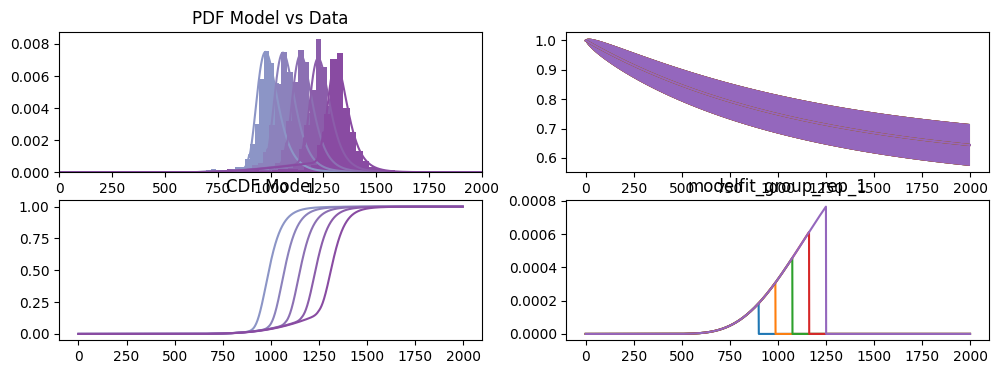

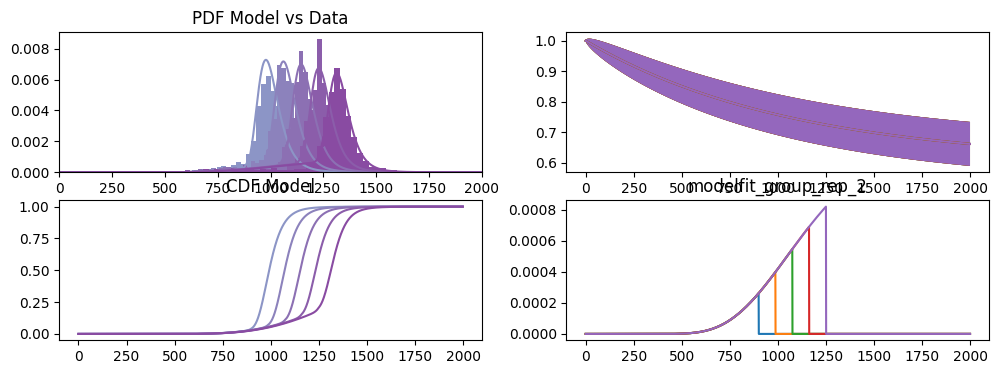

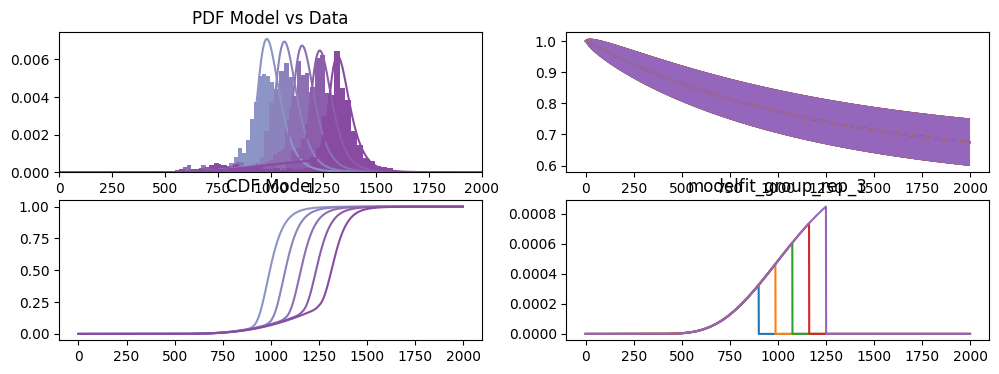

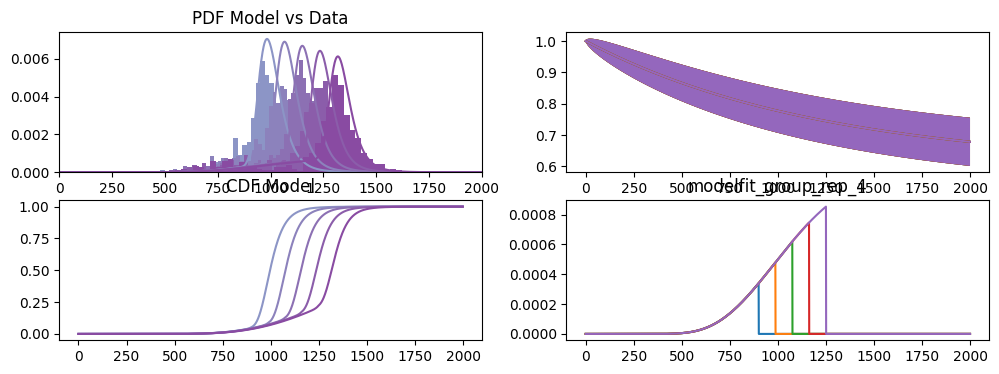

ValueError: LBFGSB - one of the lower bounds is greater than an upper bound.

In [42]:
# Fit model to repetition data with only varying baseline parameters 
from skopt import load

path = r'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Behavioural_Data'
groupData = behaviour.combineBehaviour(path = path, all_key = True, subj_key= 0, polarity_key = 0, exp_key = 0)
nback = 5
delayBins = 5
testModel = load(r'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_group_rep_0')

# Set parameters for fitting
bnds =((1, 1), (.4,.6), (0.5, 1), 
                    (.05, .1), (2/1000, 6/1000), (.6/1000, 1/1000), (1,1), (1,1))

for i in range(nback):
    repData = groupData.loc[groupData['Rep Number']== i]
    bnds = ((1, 1), (.4, .6), (0.8, 2),
                            (.05, .1), (testModel.x[4], testModel.x[4]), (testModel.x[5], testModel.x[5]),
                            (testModel.x[6], testModel.x[6]), (testModel.x[7], testModel.x[7]))
    modelFit = differential_evolution(BDI.fitBaselineModel, bounds = bnds, args=([repData, delayBins]), workers = -1)

    dump(modelFit, fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_group_rep_{i}_varyBaseline')
    BDI.plotBDIFit(modelFit = modelFit, params = None, data = repData, numBins = 5, minDelay = 750, maxDelay = 1100, plotLabel = f'modelfit_group_rep_{i}')


In [13]:
## Plot repetition outpit
from skopt import load

path = r'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Behavioural_Data'
groupData = behaviour.combineBehaviour(path = path, all_key = True, subj_key= 0, polarity_key = 0, exp_key = 0)
nback = 5
delayBins = 5
for i  in range(nback):
    repData = groupData.loc[groupData['Rep Number']== i]
    modelFit = load(fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_group_rep_{i}_varyBaseline')
    plotBDIFit(modelFit = modelFit, params = None, data = repData, numBins = 5, minDelay = 750, maxDelay = 1100, plotLabel = f'modelfit_group_rep__FIX_SENSORY{i}')


ModuleNotFoundError: No module named 'scipy.optimize._optimize'

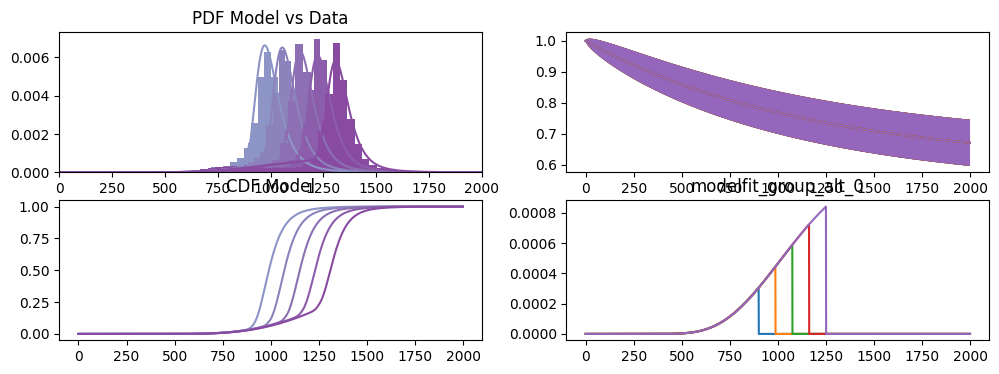

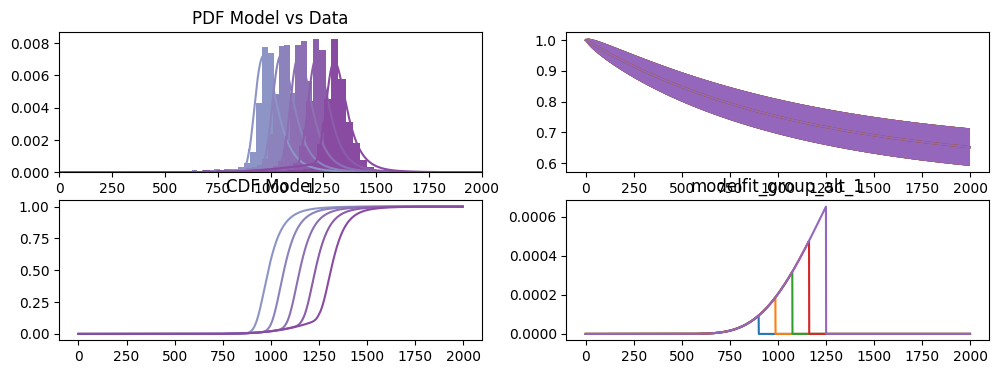

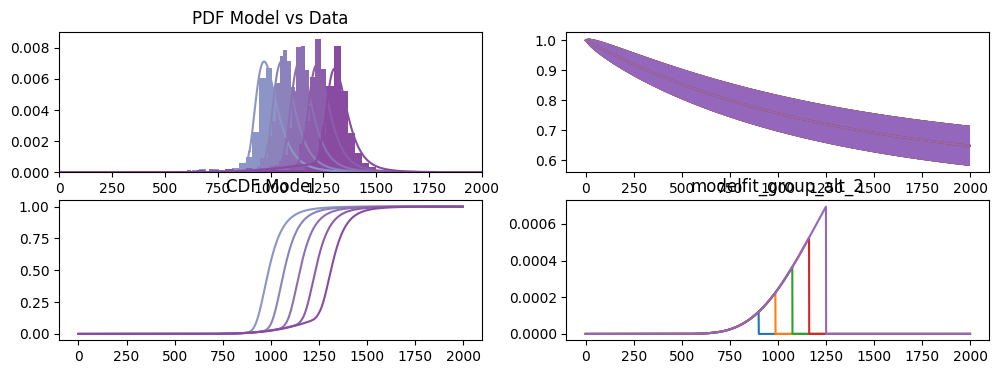

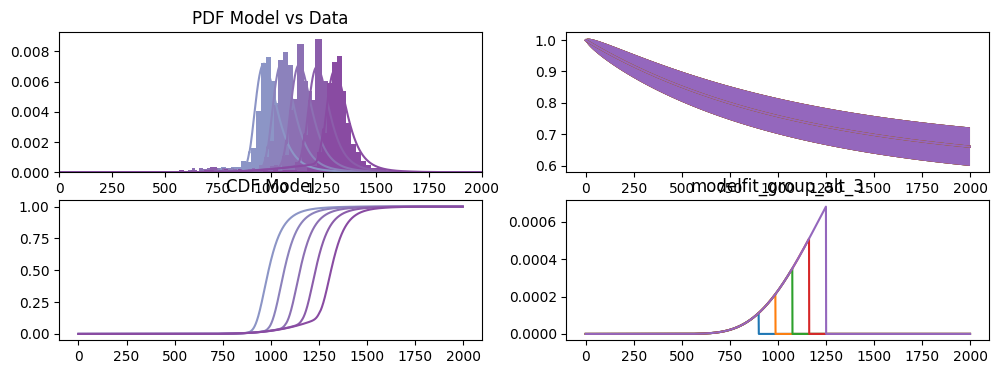

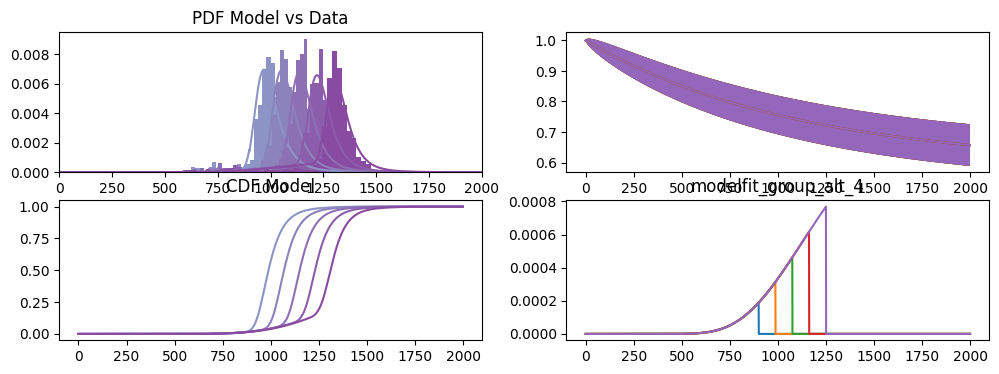

In [43]:
## Vary baseline for alternations
testModel = load(r'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_group_alt_0')

for i in range(nback):
    altData = groupData.loc[groupData['Alt Number']== i]
    bnds = ((1, 1), (.4, .6), (0.8, 2),
                            (.05, .1), (testModel.x[4], testModel.x[4]), (testModel.x[5], testModel.x[5]),
                            (testModel.x[6], testModel.x[6]), (testModel.x[7], testModel.x[7]))
    modelFit = differential_evolution(BDI.fitBaselineModel, bounds = bnds, args=([altData, delayBins]), workers = -1)
    dump(modelFit, fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_group_alt_{i}_varyBaseline')
    plotBDIFit(modelFit = modelFit, params = None, data = altData, numBins = 5, minDelay = 750, maxDelay = 1100,  plotLabel = f'modelfit_group_alt_{i}')

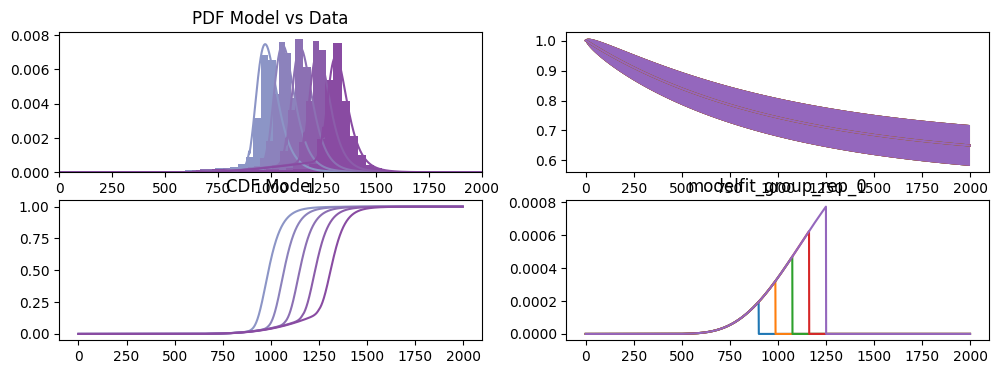

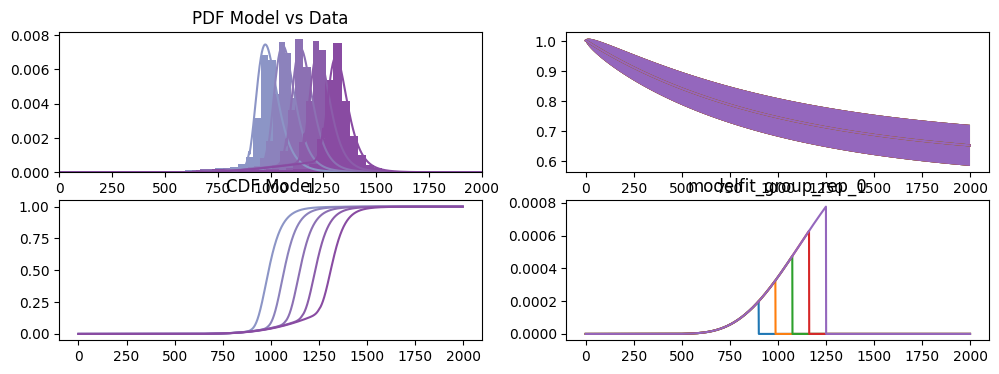

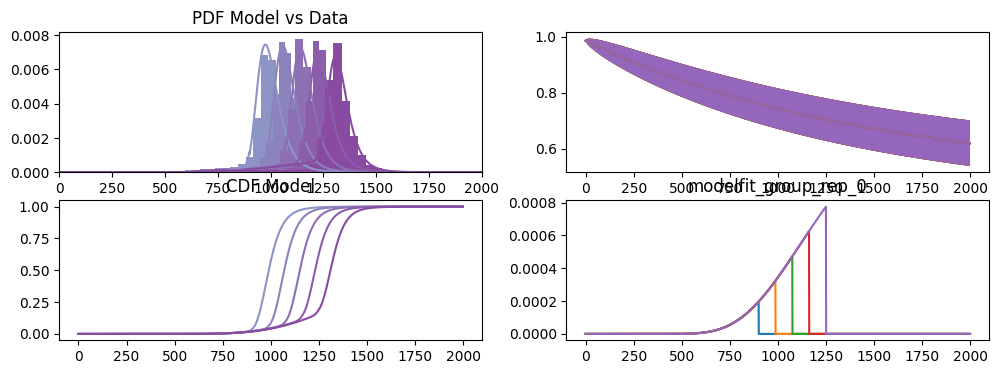

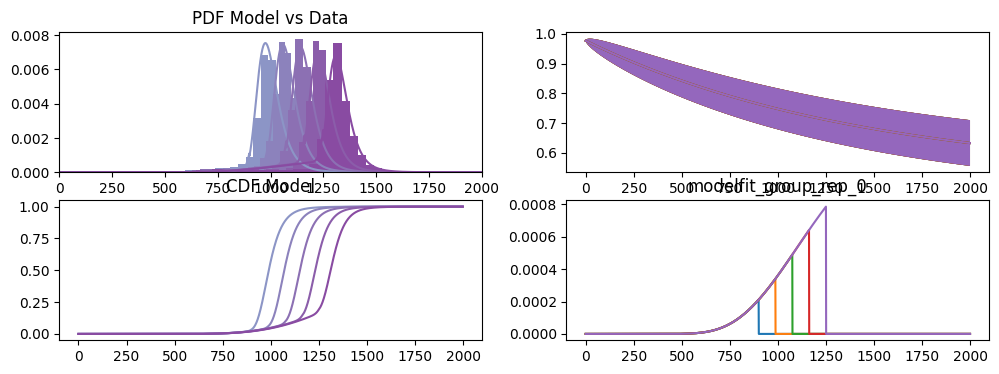

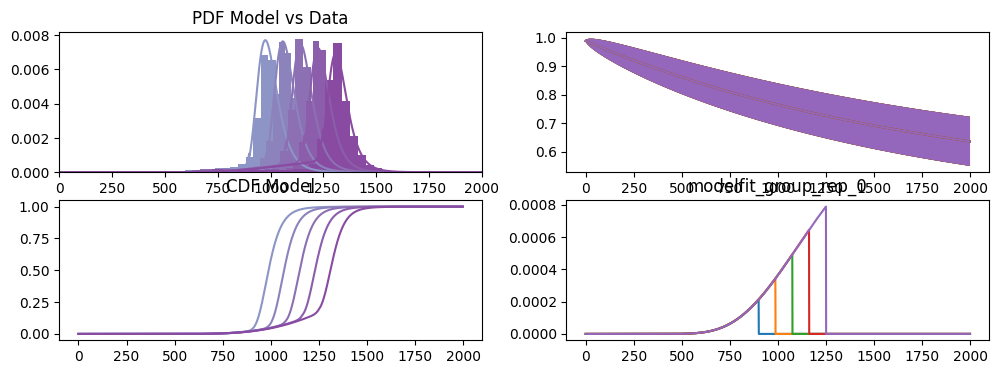

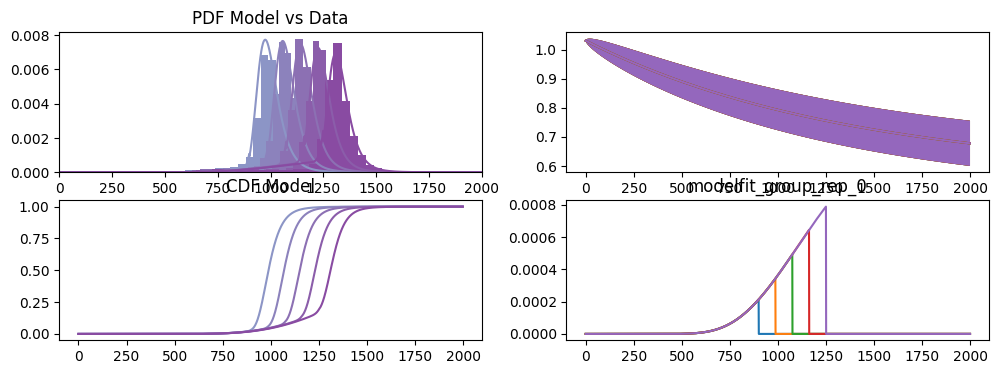

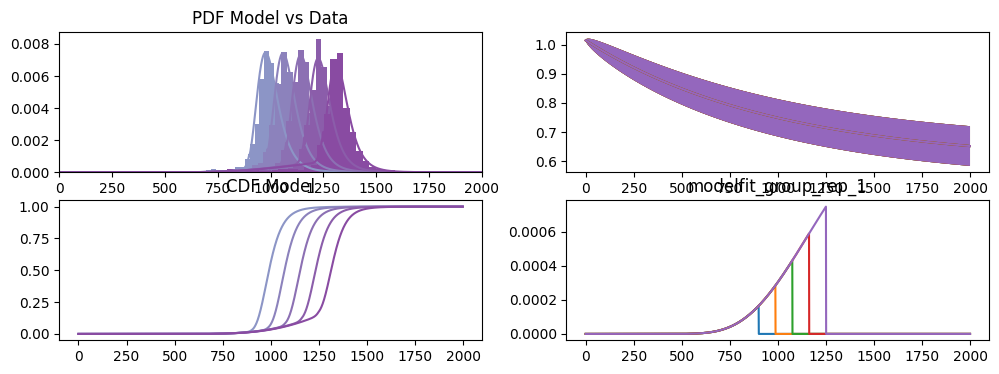

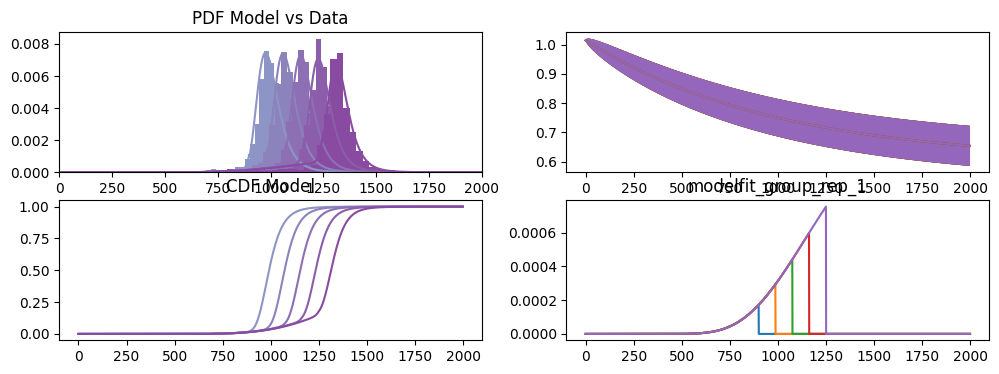

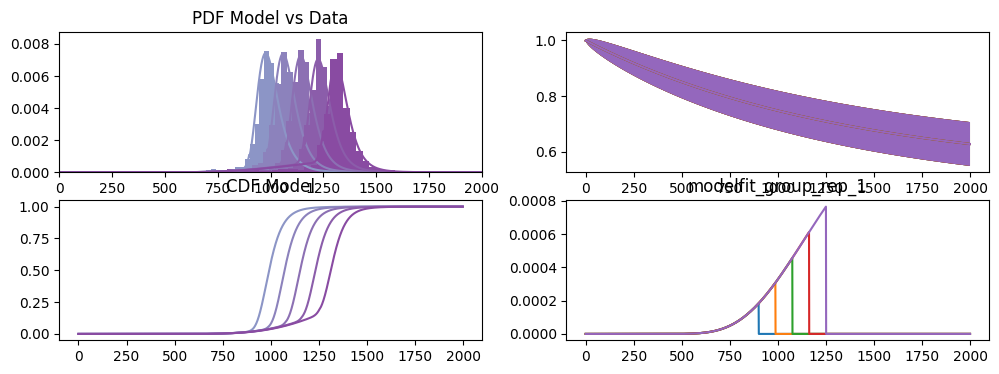

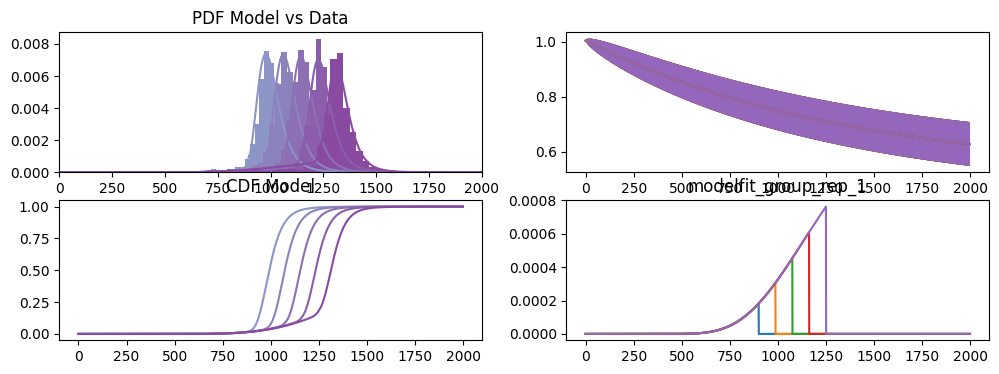

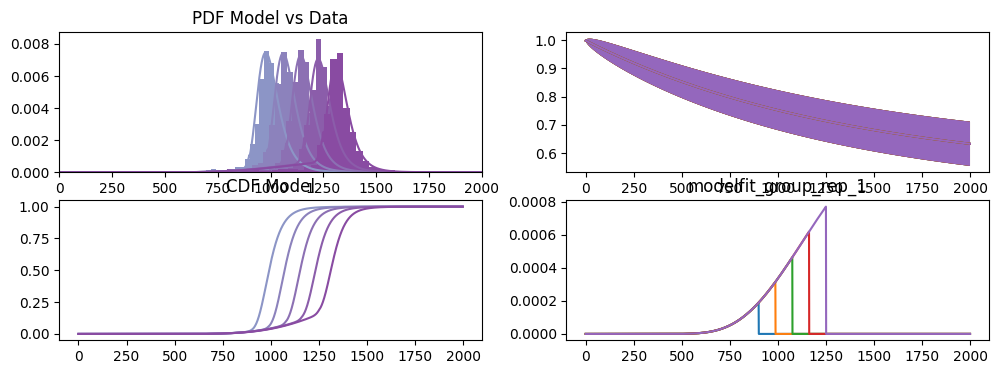

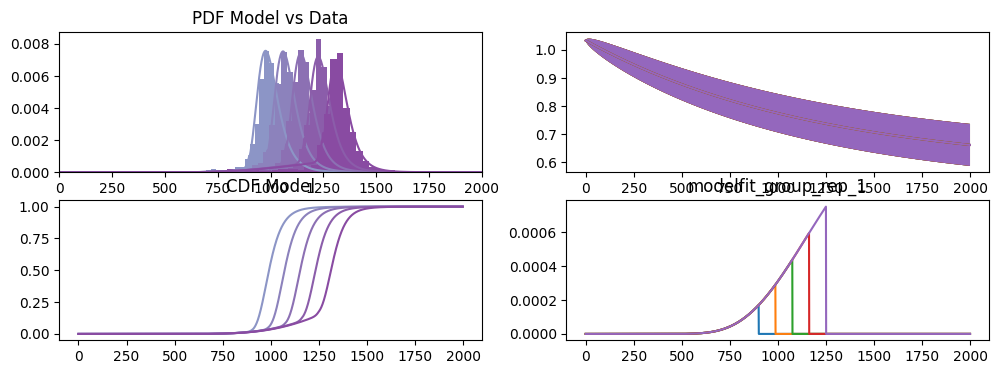

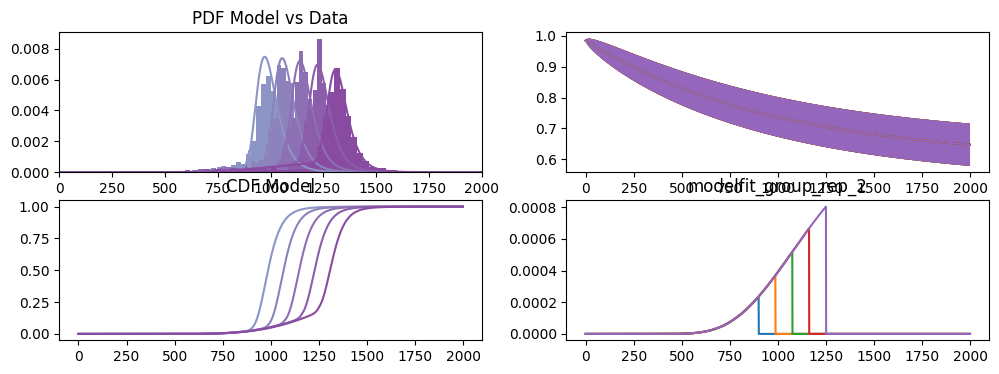

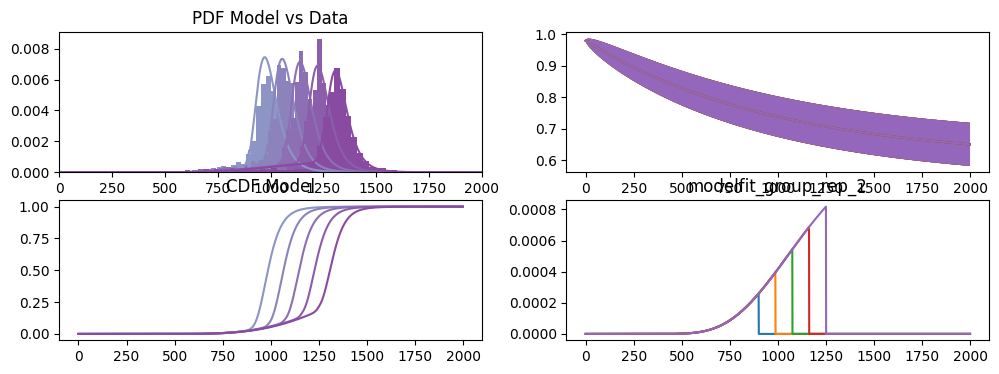

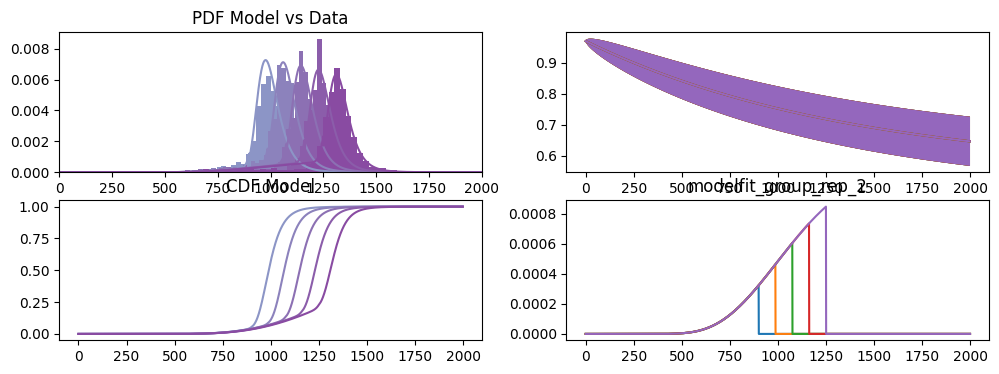

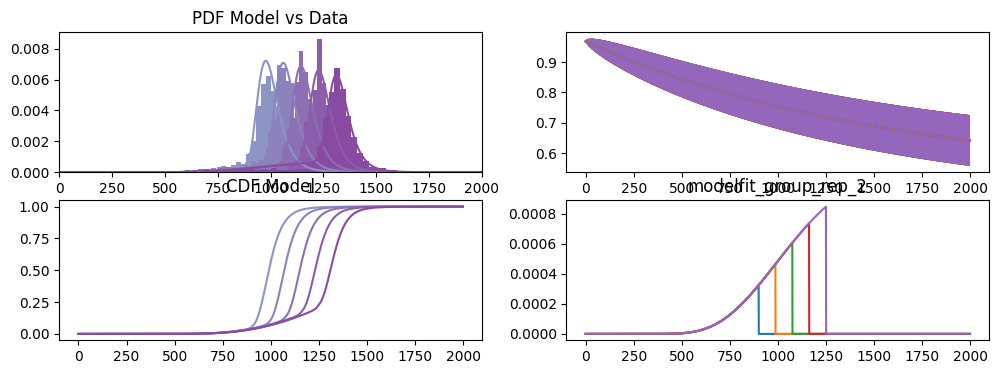

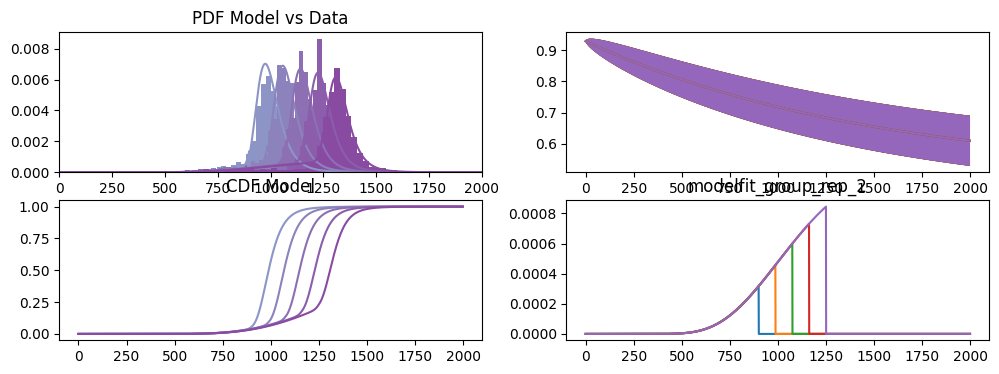

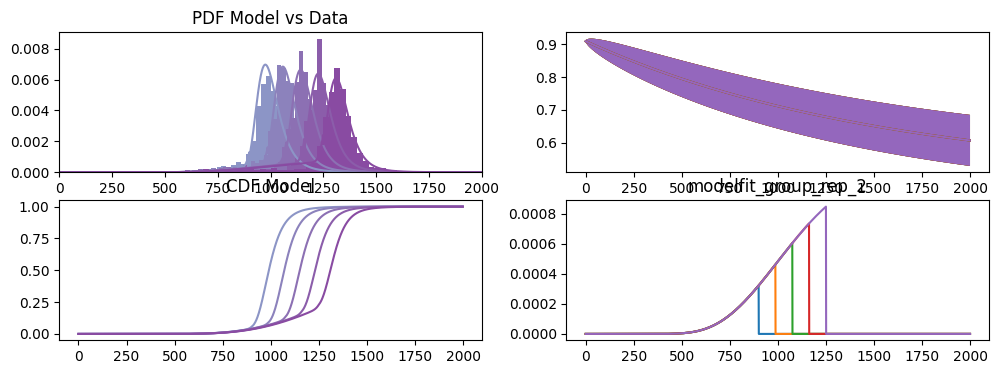

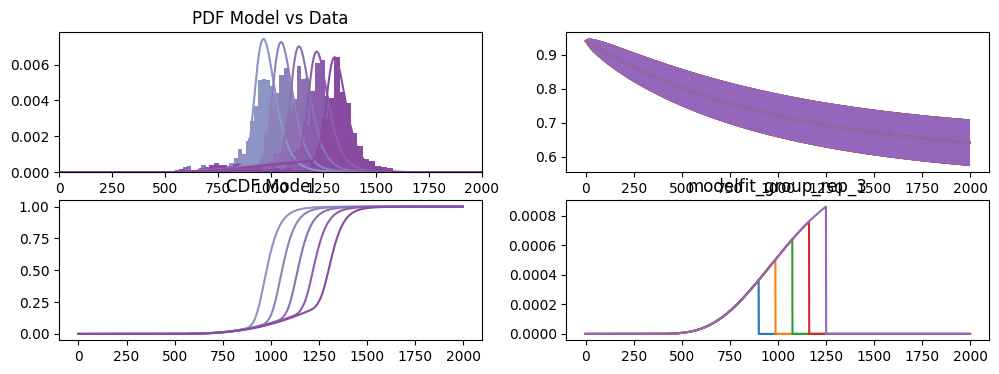

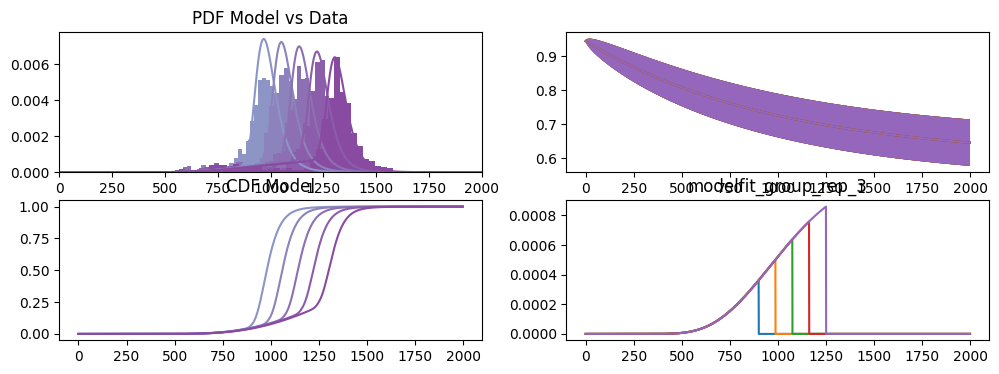

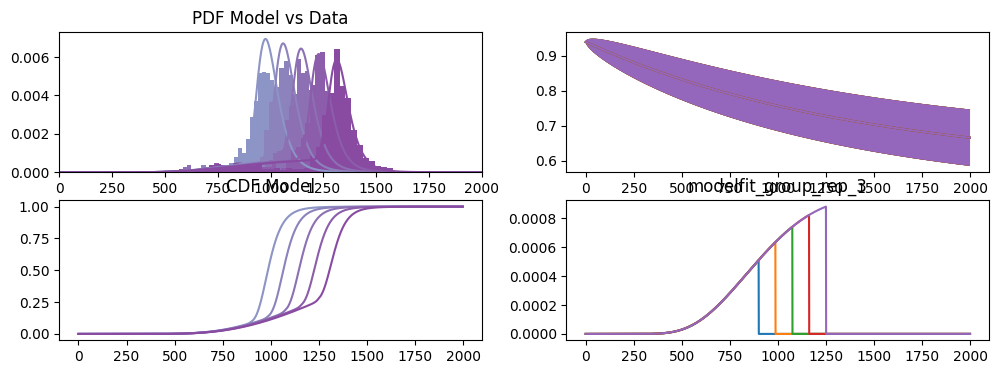

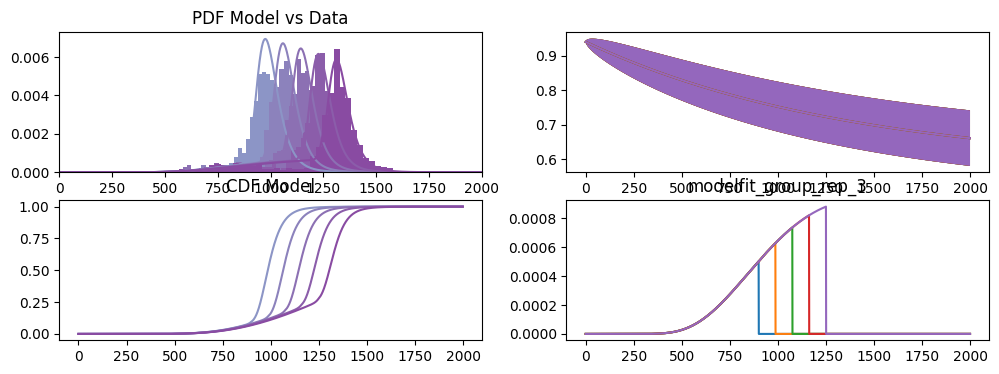

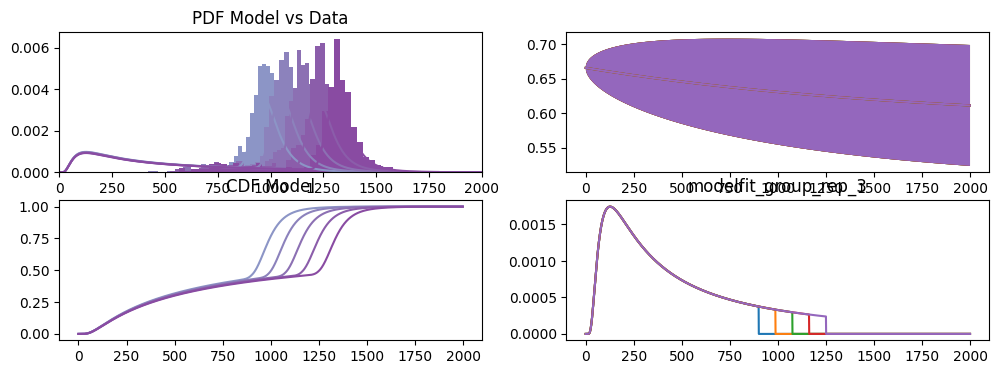

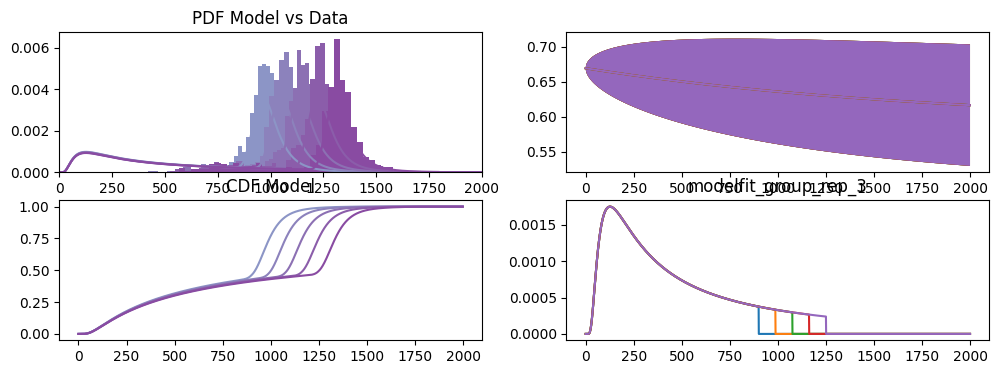

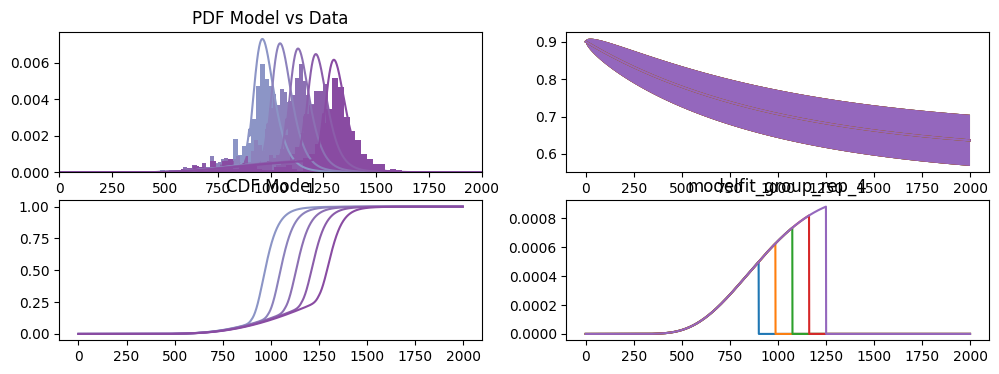

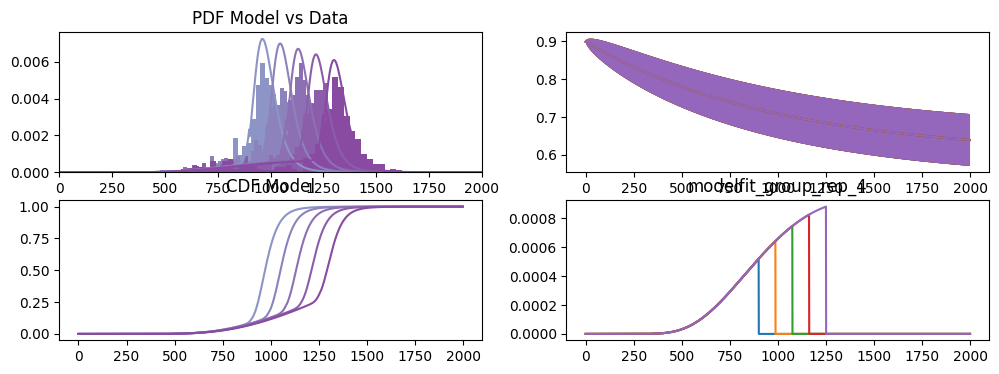

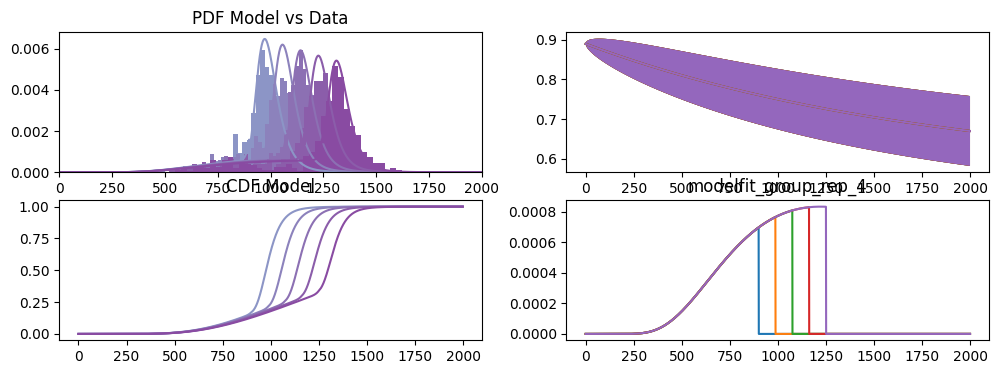

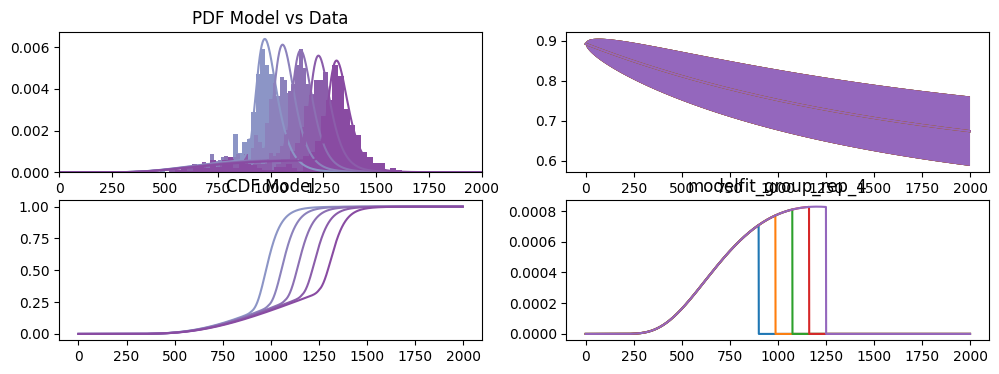

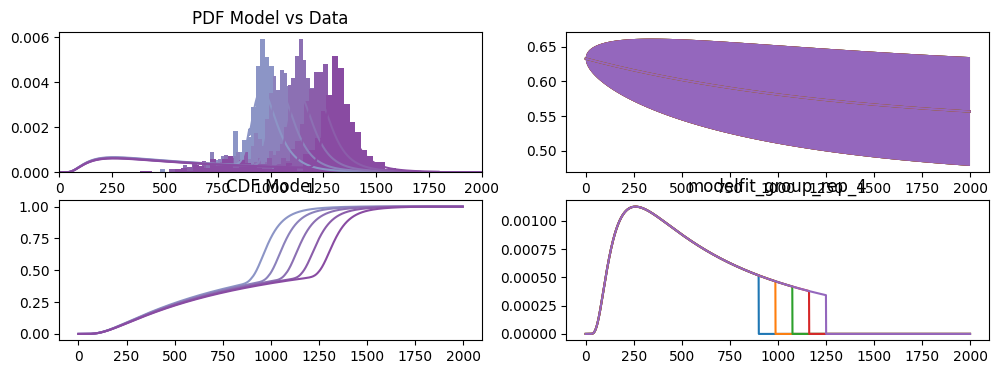

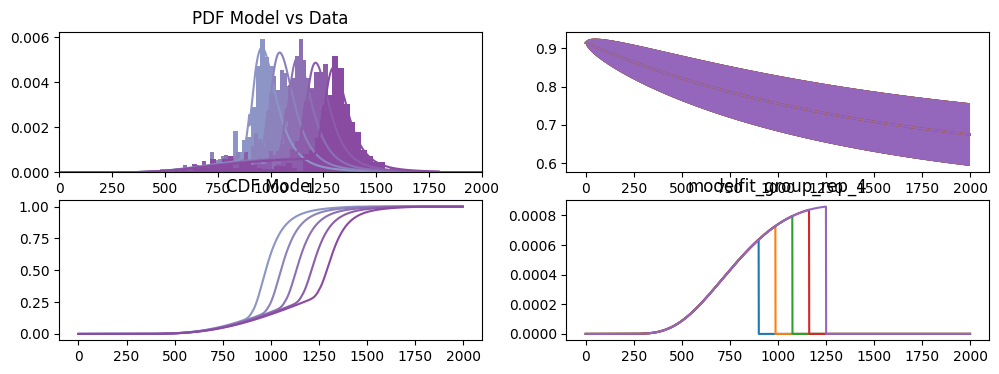

In [15]:
## Fix individual parameters, save for comparison
path = r'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Behavioural_Data'
groupData = behaviour.combineBehaviour(path = path, all_key = True, subj_key= 0, polarity_key = 0, exp_key = 0)
nback = 5
delayBins = 5

# Set parameters for fitting
init_bnds =((0.5, 1.5), (.4,.6), (0.5, 1), 
                    (.05, .1), (2/1000, 6/1000), (.6/1000, 1/1000), (1,1), (1,1))
numparams = 6
testModel = load(r'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_group_rep_0')

for i in range(nback):
    repData = groupData.loc[groupData['Rep Number']== i]
    bnds = ((testModel.x[0], testModel.x[0]), (testModel.x[1], testModel.x[1]), (testModel.x[2], testModel.x[2]),
                        (testModel.x[3], testModel.x[3]), (testModel.x[4], testModel.x[4]), (testModel.x[5], testModel.x[5]),
                        (testModel.x[6], testModel.x[6]), (testModel.x[7], testModel.x[7]))

    for j in range(numparams):
        # Replace single parameter variability in bounds
        list_bnds = list(bnds)
        list_bnds[j] = init_bnds[j]
        bnds = tuple(list_bnds)       
        modelFit = differential_evolution(BDI.fitBaselineModel, bounds = bnds, args=([repData, delayBins]), workers = -1)

        dump(modelFit, fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_group_rep_{i}_varyparam_{j}')
        BDI.plotBDIFit(modelFit = modelFit, params = None, data = repData, numBins = 5, minDelay = 750, maxDelay = 1100, plotLabel = f'modelfit_group_rep_{i}')


In [5]:
from skopt import load

path = r'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Behavioural_Data'
groupData = behaviour.combineBehaviour(path = path, all_key = True, subj_key= 0, polarity_key = 0, exp_key = 0)
nback = 5
delayBins = 5

for i in range(nback):
    repData = groupData.loc[groupData['Rep Number']== i]
    modelFit = load(fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_group_rep_{i}_varyKappa')
    BDI.plotBDIFit(modelFit = modelFit, params = None, data = repData, numBins = 1, minDelay = 1050, maxDelay = 1100, plotLabel = f'single_delay_rep_{i}_1000')
    print(modelFit.x)
    #plotBDIFit(modelFit = modelFit, params = None, data = repData, numBins = 1, minDelay = 800, maxDelay = 800, plotLabel = f'single_delay_rep_{i}_800')
    #altData = groupData.loc[groupData['Rep Number']== i]
    #modelFit = load(fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_group_alt_{i}_varyKappa')
    #plotBDIFit(modelFit = modelFit, params = None, data = altData, numBins = 1, minDelay = 1050, maxDelay = 1100, plotLabel = f'single_delay_alt_{i}_1000')
    #plotBDIFit(modelFit = modelFit, params = None, data = altData, numBins = 1, minDelay = 800, maxDelay = 800, plotLabel = f'single_delay_alt_{i}_800')


ModuleNotFoundError: No module named 'scipy.optimize._optimize'

In [14]:
## Fit same model to data with variable mixing only...see if it improves
from skopt import load
nback = 5
path = r'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Behavioural_Data'
groupData = behaviour.combineBehaviour(path = path, all_key = True, subj_key= 0, polarity_key = 0, exp_key = 0)

def testRetestModel(testModel, data, fixedParams):
    """ Fix parameters of one model and retrain to another dataset

    Args:
        testModel (OptimizeResult): model fit returned from differential evolution scipy packahge. 
        data (df): free choice dataframe
        fixedParams (np.array): array of parameter indices to fix
    """
    ## Set base initial boundaries for model
    base_bnds =((0.1, 1), (.4,.6), (1, 2), 
                    (.05, .1), (2/1000, 6/1000), (.6/1000, 1/1000), (1,1), (1,1))
    
    # Set number of delay bins to fit data over
    delayBins = 5

    # Fix bounds for fixed parameters
    for count, param in enumerate(fixedParams):
        base_bnds[count,:] = testModel.x[param]

    # Train model
    trainModel = differential_evolution(BDI.fitBaselineModel, bounds = bnds, args=([data, delayBins]))

    return trainModel

repData = groupData.loc[groupData['Rep Number']== 5]
modelFit = load(fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_group_rep_{1}')

ModuleNotFoundError: No module named 'scipy.optimize._optimize'

In [18]:
## Fix different parameters, plot difference in model fit
from skopt import load
nback = 5
path = r'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Behavioural_Data'
groupData = behaviour.combineBehaviour(path = path, all_key = True, subj_key= 0, polarity_key = 0, exp_key = 0)
rep0 = load(fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_group_rep_0')

for i in range(nback):
    repData = groupData.loc[groupData['Rep Number']== i]
    modelFit = load(fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_group_rep_{i}')
    print(modelFit.x)

[1.00000000e+00 5.98429990e-01 1.00154969e+00 8.93459699e-02
 4.33326340e-03 1.00060247e-03 1.00000000e+00 1.00000000e+00]
[1.00000000e+00 5.99644368e-01 1.00198841e+00 8.50925499e-02
 4.31115019e-03 1.00154897e-03 1.00000000e+00 1.00000000e+00]
[1.00000000e+00 5.99079181e-01 1.00092180e+00 9.86400119e-02
 4.33081022e-03 1.00010185e-03 1.00000000e+00 1.00000000e+00]
[1.00000000e+00 5.99755647e-01 1.00044061e+00 9.99557212e-02
 4.38331309e-03 1.00039845e-03 1.00000000e+00 1.00000000e+00]
[1.         0.59969142 1.00492869 0.09970793 0.00453804 0.00105724
 1.         1.        ]


In [5]:
## Fit Model to all Data
from skopt import dump
path = r'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Behavioural_Data'
subj_path = r'E:\Free Choice\Data\tDCS\tDCS\Final Data'
subj_keys = behaviour.get_immediate_subdirectories(subj_path)
polarity_keys = ['AN', 'CA']
exp_keys = ['PR', 'PO', 'ST']

for subj in subj_keys:
    for polarity in polarity_keys:
        for exp in exp_keys:
            data = behaviour.combineBehaviour(path = path, all_key = False, subj_key= subj, polarity_key = polarity, exp_key = exp)
            bnds = ((0, 0), (1e-8, 3), (0, .005), 
                        (1e-8, .2), (1e-5, 9/1e-4), (1e-6, 1e-5), (0.001, 1), (0.001, 5))
            modelFit = differential_evolution(BDI.fitBaselineModel, bounds = bnds, args=([data]))
            dump(modelFit, fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_{subj}_{polarity}_{exp}')
            plotBDIFit(modelFit, data, numBins = 10, minDelay = 750, maxDelay = 1250)


probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilities contain nan
probabilitie

In [16]:
## Load and plot model fits without running fitting
from skopt import load

path = r'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Behavioural_Data'
subj_path = r'E:\Free Choice\Data\tDCS\tDCS\Final Data'
subj_keys = behaviour.get_immediate_subdirectories(subj_path)
polarity_keys = ['AN', 'CA']
exp_keys = ['PR', 'ST', 'PO']

for subj in subj_keys:
    for polarity in polarity_keys:
        for exp in exp_keys:
            data = behaviour.combineBehaviour(path = path, subj_key= subj, polarity_key = polarity, exp_key = exp, all_key = 'none')
            modelFit = load(fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_{subj}_{polarity}_{exp}')
            plotBDIFit(modelFit, data, numBins = 10, minDelay = 750, maxDelay = 1250)


ModuleNotFoundError: No module named 'scipy.optimize._optimize'

In [ ]:
def binDelaydata(data, minDelay, maxDelay, numBins):
    """Split up free choice data into a dictionary by equally spaced delay time bins

    Args:
        data (df): free choice dataframe 
        minDelay (int): minimum delay time for setting bins
        maxDelay (int): max delay time for setting bins
        numBins (int): number of bins 

    Returns:
        delayidx: free choice dataframes separated into a dictionary, where the index for each is the delay bin (ex delayidx['750.0'] == all data within delay bin 1 )
    """

    delays= np.linspace(minDelay, maxDelay, numBins)
    delayidx = dict()
    
    # Get Indices for delay bins
    if numBins == 1:
        delayidx[str(delays[0])] = data
    else:
        for i in range(numBins):
            if i == numBins-1:
                delayidx[str(delays[i])] = data[(data['First Target Onset'] >= delays[i])] 
            else:
                delayidx[str(delays[i])] = data[(data['First Target Onset'] >= delays[i]) & (data['First Target Onset'] < delays[i+1])]

    return delayidx

def plotBDIFit(modelFit, params, data, numBins, minDelay, maxDelay, plotLabel):
    """ Plotting function for returning pdf and cdf of model vs data. 
    Arguments follow previous conventions. 
    """

    # Compute recovered model
    if params == None:
        recoveredModel = BDI.baselineDynamicIntegrator('Fitted Model', time = np.arange(1,2000), xO = modelFit.x[0], 
                        theta = modelFit.x[1] , kappa = modelFit.x[2], sigma = modelFit.x[3], muR = modelFit.x[4],
                        sR = modelFit.x[5], k = modelFit.x[6], scale = modelFit.x[7], maxT = 700)
    else:
        recoveredModel = BDI.baselineDynamicIntegrator('Fitted Model', time = np.arange(1,2000), xO = params[0], 
                    theta = params[1] , kappa = params[2], sigma = params[3], muR = params[4],
                    sR = params[5], k = params[6], scale = params[7], maxT = 700)
       
    
    # Return binned delay data for plotting
    if isinstance(data, pd.DataFrame):
        delayidx = binDelaydata(data, minDelay = minDelay, maxDelay = maxDelay, numBins = numBins)            
    delays= np.linspace(minDelay, maxDelay, numBins)
    
    # Set plotting colours
    _ , axs = plt.subplots(2, 2, figsize=(12,4))
    color = iter(cm.BuPu(np.linspace(0.5, 1, 10)))
    RT = []
    
    # Loop over delay bins and plot data overlayed with model
    for delay in delays:

        # Run model on single delay 
        recoveredModel.setDelayTimes(np.linspace(delay, delay, 1))
        recoveredModel.BDI()

        # Plot results
        c = next(color)
        axs[0,0].plot(recoveredModel.combined, c = c)

        if isinstance(data, pd.DataFrame):
            RT = delayidx[str(delay)]['Reaction Time: First Target'] + delay #Align to delay time 
            RT = RT.to_numpy()
            axs[0,0].hist(RT, bins = 50, density = True, color = c)
            
        axs[0,0].set_title('PDF Model vs Data')
        axs[0,0].set_xlim([0, 2000])
        axs[1,0].plot(np.cumsum(recoveredModel.combined), c =  c)
        axs[1,0].set_title('CDF Model')

        axs[0,1].plot(recoveredModel.ouMean)
        axs[0,1].fill_between(np.arange(1,2000), recoveredModel.ouMean - recoveredModel.ouVar,
                        recoveredModel.ouMean + recoveredModel.ouVar)

        axs[1,1].plot(recoveredModel.pAnticipatory)

    plt.savefig(rf"C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Figures\{plotLabel}_model_fit", format='svg')
    plt.show()
